# **菊安酱与菜菜的Python机器学习可视化**

## 第三期 排序图 (2)

<img src="http://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week1correlation/line4.png" align="center" />

## <center>每周三晚上8点直播1小时，完整版2小时周日上线~</center>
## <center>单数周菜菜直播，双数周菊安酱直播，哔哩哔哩与peixun.net同步开启</center>

<img src="http://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week1correlation/line4.png" align="center" />

**注意：本篇中可能遇见无法在matpotlib和seaborn中显示中文或者负号的问题**  
如果你遇见了，请参考链接，可永久解决中文和负号问题：https://www.jianshu.com/p/914b5f4ce6bf  
或者你也可以在每次需要负号和中文的时候执行下面的代码来避免中文或负号显示不出来：

In [60]:
plt.rcParams['font.sans-serif']=['Simhei'] 
plt.rcParams['axes.unicode_minus']=False

<img src="http://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week1correlation/line4.png" align="center" />

### 18/50 坡度图

坡度图是对比两种不同类型下取值的最佳图像，最适合比较给定的人/项目/数据的“之前”和“之后”的位置和变化

<img src="http://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week3%20Ranking/%E5%9D%A1%E5%BA%A6%E5%9B%BE%20%2B%20%E8%A7%A3%E9%87%8A.PNG" align="center" />

横坐标：时间（前，后）<br>
纵坐标：人均国内生产总值（人均GDP）<br>
线条颜色：绿色表示上升，红色表示下降

### 1. 导入需要的绘图库

In [5]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#如果你在使用Jupyter Notebook，你会需要这样一句命令来让你的图像显示

### 2. 先来认识一下在两点之间连线的函数

在两点之间绘制一条线，和绘制一整个折线图的思路并不相似  
我们希望添加一个对象，但这个对象却不带有横纵坐标轴，而是在子图上可以加上的某个东西  
这其实比较像我们之前添加凸包，添加画布上的矩形的思路：  
我们首先需要创建一个直线对象，然后使用add这样的功能来将直线对象添加到图像上去  
因此我们要认识两个函数，创造直线对象的函数，以及将直线对象添加到子图或者画布上的函数

#### **matplotlib.lines.Line2D**: 创建直线对象

> **重要参数**
>> xdata：所有需要链接的点的横坐标  
>> ydata：所有需要链接的点的纵坐标   
>> marker：用于连线的点的形状  
>> markersize：用于连线的点的尺寸

#### **add_line()**：添加直线对象

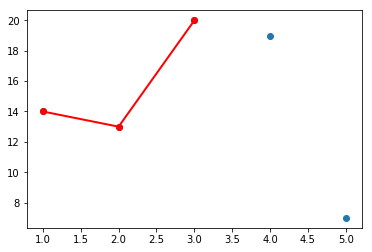

In [18]:
import matplotlib.lines as mlines #导入模块lines，专门用于直线绘图的模块

X = [1,2,3,4,5]
y = [14,13,20,19,7]

fig, ax = plt.subplots(1,1) #一行一列
ax.scatter(X,y);

l = mlines.Line2D([1,2,3] #所有希望链接的点的横坐标
                  ,[14,13,20] #所有希望链接的点的纵坐标
                  , color='red' #线的颜色
                  , linewidth=2 #线的宽度
                  , marker='o' #绘制出来的点的形状
                  , markersize=6 #点的大小
                 )
ax.add_line(l); #将对象添加到子图上

In [7]:
#观察一下如果没有点图会发生什么样的现象？

p1(x1,y1)
p2(x2,y2)

Line2D([x1,x2],[y1,y2])

In [3]:
#将上述过程打包成函数
def newline(p1, p2, color='black'): #在我们习惯的逻辑中，还是直接输入点的坐标更加容易
    ax = plt.gca() #get current ax 获取的子图，如果没有子图就自己创建一个子图
    l = mlines.Line2D([p1[0],p2[0]], [p1[1],p2[1]]
                      , color='red' if p1[1]-p2[1] > 0 else 'green'
                      , marker='o', markersize=6)
    ax.add_line(l)
    return l

In [4]:
#使用列表推倒式来表达颜色

In [ ]:
if 2-1>0:
    "red"
else:
    "green"

In [20]:
#'red' if 2-1 > 0 else 'green'
'red' if 1-2 > 0 else 'green'

'green'

### 3. 认识数据，准备数据

In [21]:
#导入数据
df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/gdppercap.csv")

In [22]:
df #一个非常简单的数据集

,continent,1952,1957
0,Africa,1252.572466,1385.236062
1,Americas,4079.062552,4616.043733
2,Asia,5195.484004,4003.132940
3,Europe,5661.057435,6963.012816
4,Oceania,10298.085650,11598.522455


In [28]:
#从数据中调取需要的标签
left_label = [str(c) + ', '+ str(round(y)) for c, y in zip(df.continent, df['1952'])]
right_label = [str(c) + ', '+ str(round(y)) for c, y in zip(df.continent, df['1957'])]

In [30]:
left_label[0]

'Africa, 1253'

In [23]:
[*zip(df.continent, df['1952'])]

[('Africa', 1252.57246582115),
 ('Americas', 4079.0625522),
 ('Asia', 5195.484004039389),
 ('Europe', 5661.05743476),
 ('Oceania', 10298.08565)]

In [27]:
round(1252.57246582115) #返回一个整数（四舍五入）

1253

In [9]:
for c, y in zip(df.continent, df['1952']):
    print(str(c) + ', '+ str(round(y)))

Africa, 1253
Americas, 4079
Asia, 5195
Europe, 5661
Oceania, 10298


### 4. 代码解读

In [32]:
df.shape[0]

5

In [31]:
np.repeat(1 #我需要进行重复的对象
          , df.shape[0] #我想要重复的次数
         ) #对我输入的对象进行n次重复，组成一个新的数组

array([1, 1, 1, 1, 1])

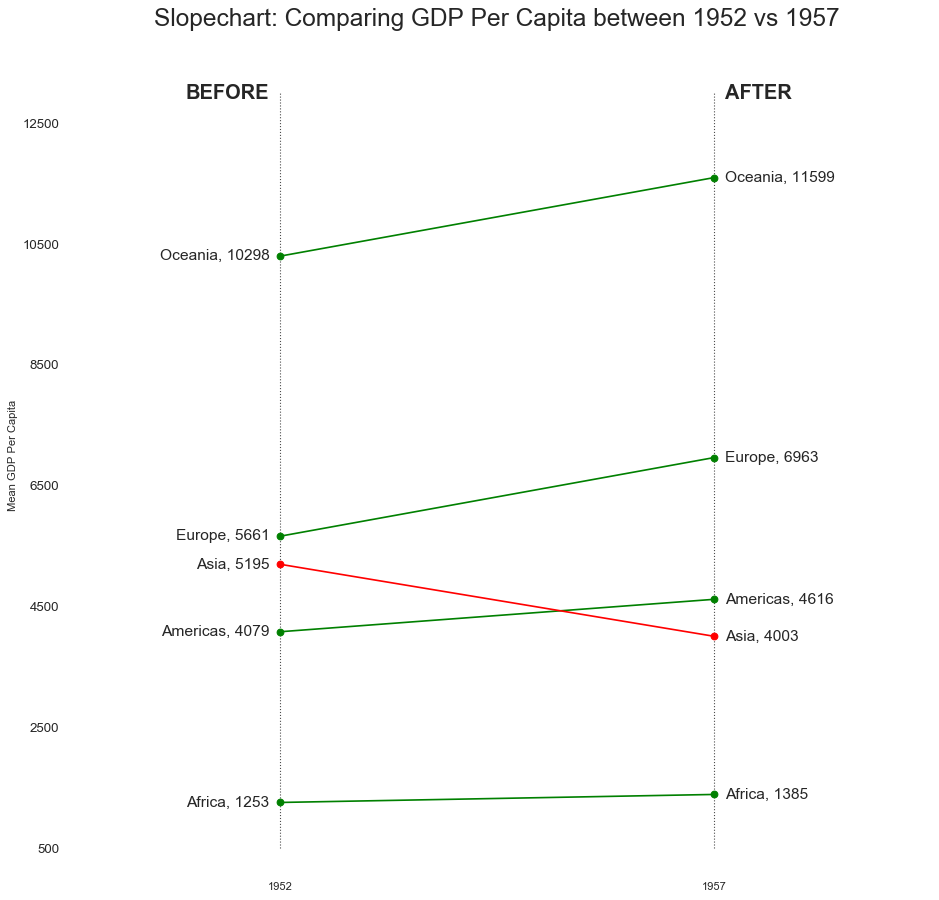

In [46]:
#设置风格
plt.style.use('seaborn-whitegrid')
sns.set_style("white")

#从数据中调取需要的标签
left_label = [str(c) + ', '+ str(round(y)) for c, y in zip(df.continent, df['1952'])]
right_label = [str(c) + ', '+ str(round(y)) for c, y in zip(df.continent, df['1957'])]

#定义绘制折线函数
def newline(p1, p2, color='black'):
    ax = plt.gca()
    l = mlines.Line2D([p1[0],p2[0]], [p1[1],p2[1]], color='red' if p1[1]-p2[1] > 0 else 'green', marker='o', markersize=6)
    ax.add_line(l)
    return l

#创建子图
fig, ax = plt.subplots(1,1,figsize=(14,14), dpi= 80)

#绘制两条竖线
ax.vlines(x=1, ymin=500, ymax=13000, color='black', alpha=0.7, linewidth=1, linestyles='dotted')
ax.vlines(x=3, ymin=500, ymax=13000, color='black', alpha=0.7, linewidth=1, linestyles='dotted')

#在两条线的每个数据点上打上散点
ax.scatter(y=df['1952'], x=np.repeat(1, df.shape[0]), s=10, color='black', alpha=0.7)
ax.scatter(y=df['1957'], x=np.repeat(3, df.shape[0]), s=10, color='black', alpha=0.7)

#绘制折线
for p1, p2, c in zip(df['1952'], df['1957'], df['continent']):
    newline([1,p1], [3,p2])
    #在每个数据点的旁边添加文字
    ax.text(1-0.05, p1, c + ', ' + str(round(p1))
            , horizontalalignment='right' #横向的左中右
            , verticalalignment='center' #纵向的上中下
            , fontdict={'size':14})
    ax.text(3+0.05, p2, c + ', ' + str(round(p2))
            , horizontalalignment='left'
            , verticalalignment='center'
            , fontdict={'size':14})

#将“BEFORE”和“AFTER”字样放到图像中
ax.text(1-0.05, 13000, 'BEFORE'
        , horizontalalignment='right'
        , verticalalignment='center'
        , fontdict={'size':18
                   , 'weight':700 #加粗文字
                   })
ax.text(3+0.05, 13000, 'AFTER', horizontalalignment='left', verticalalignment='center', fontdict={'size':18, 'weight':700})

#装饰图像
ax.set_title("Slopechart: Comparing GDP Per Capita between 1952 vs 1957", fontdict={'size':22}) #标题
ax.set(xlim=(0,4), ylim=(0,14000), ylabel='Mean GDP Per Capita') #横纵坐标的取值范围，纵坐标的标题
ax.set_xticks([1,3]) #横坐标的标尺
ax.set_xticklabels(["1952", "1957"]) #横坐标标尺的标题
plt.yticks(np.arange(500, 13000, 2000), fontsize=12) #设置纵坐标的标尺
#注意这里就出现了plt和ax的混用，在这里混用是因为要调整标尺的大小，而ax.set_yticks没有便利调整标尺大小的方式

#将图像的横纵坐标透明化：核心Artisit：坐标轴，用spines表示
plt.gca().spines["top"].set_alpha(.0)
plt.gca().spines["bottom"].set_alpha(.0)
plt.gca().spines["right"].set_alpha(.0)
plt.gca().spines["left"].set_alpha(.0)
plt.show()

### 5. 解读图像

In [ ]:
#1952~1957年之间发生了什么呢？

可以参考的历史事件：<br>
1950 ~ 1953 朝鲜战争<br>
1946 ~ 1954 第一次印尼战争<br>
1952 ~ 1957 中国的第一个五年计划，劳动力需求激增，城乡人口逐渐失衡  
从1952 ~ 1957，亚洲人口增加了1.4亿<br>

<img src="http://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week1correlation/line4.png" align="center" />

### 19/50 哑铃图

哑铃图和坡度图非常类似，它的功能是展示给定的人/项目/数据的“之前”和“之后”的变化。通常来说前后指的是“时间”，但其实也可以是某个计划/项目执行前后，某个因素出现前后对不同对象的影响。



<img src="http://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week3%20Ranking/%E5%93%91%E9%93%83%E5%9B%BE.PNG" align="center" />

横坐标：医疗支出占人均GDP的百分比  
纵坐标：城市名称  
浅蓝色的点：2014年  
深蓝色的点：2013年

### 1. 导入需要的绘图库

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### 2. 探索数据，处理数据

In [2]:
# Import Data
df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/health.csv")

In [3]:
df.head()

,Area,pct_2014,pct_2013
0,Houston,0.19,0.22
1,Miami,0.19,0.24
2,Dallas,0.18,0.21
3,San Antonio,0.15,0.19
4,Atlanta,0.15,0.18


In [ ]:
names = ["地区","2014年医疗费用百分比","2013年医疗费用百分比"]

#猜测：这是不同地区的医疗费用占人均GDP的一个百分比

In [4]:
#观察图像，首先我们的数据是有序的，从上到下，我们的2014年的费用占比是越来越大的
df.sort_values('pct_2014', inplace=True)

In [6]:
#绘制直线，需要坐标点，而我们的纵坐标是城市名称，不可能直接导入进行绘图
#因此我们需要把城市排过序后的索引变成一列特征
df.reset_index(inplace=True)

In [7]:
df.head()

,index,Area,pct_2014,pct_2013
0,25,Boston,0.04,0.04
1,23,Pittsburgh,0.06,0.07
2,22,Baltimore,0.06,0.09
3,24,Minneapolis,0.06,0.08
4,21,San Francisco,0.08,0.11


In [15]:
df.min()

index                     0
Area        All Metro Areas
pct_2014               0.04
pct_2013               0.04
dtype: object

In [16]:
df.max()

index                     25
Area        Washington, D.C.
pct_2014                0.19
pct_2013                0.24
dtype: object

In [17]:
df.shape[0]

26

### 3. 代码详解

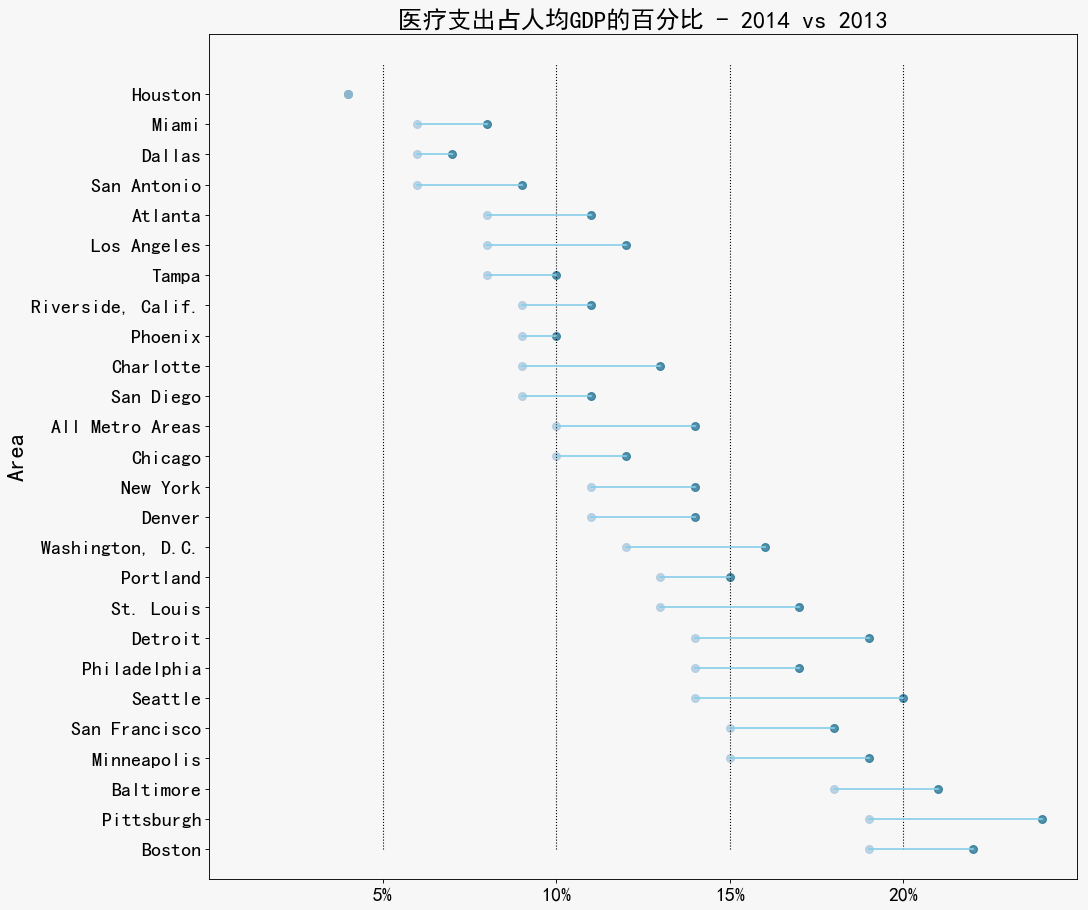

In [22]:
#定义绘制折线的函数
def newline(p1, p2, color='black'):
    ax = plt.gca()
    l = mlines.Line2D([p1[0],p2[0]], [p1[1],p2[1]], color='skyblue')
    ax.add_line(l)
    return l

#建立子图和画布
fig, ax = plt.subplots(1,1,figsize=(14,14)
                       , facecolor='#f7f7f7' #除了颜色的名字，也可以通过输入颜色的编码来找到颜色
                       , dpi= 80)

#绘制四条竖线
ax.vlines(x=.05, ymin=0, ymax=26, color='black', alpha=1, linewidth=1, linestyles='dotted')
ax.vlines(x=.10, ymin=0, ymax=26, color='black', alpha=1, linewidth=1, linestyles='dotted')
ax.vlines(x=.15, ymin=0, ymax=26, color='black', alpha=1, linewidth=1, linestyles='dotted')
ax.vlines(x=.20, ymin=0, ymax=26, color='black', alpha=1, linewidth=1, linestyles='dotted')

#绘制需要连线的点
ax.scatter(y=df['index'], x=df['pct_2013'], s=50, color='#0e668b', alpha=0.7)
ax.scatter(y=df['index'], x=df['pct_2014'], s=50, color='#a3c4dc', alpha=0.7);

#将线链接起来
for i, p1, p2 in zip(df['index'], df['pct_2013'], df['pct_2014']):
    newline([p1, i], [p2, i])

#装饰
ax.set_facecolor('#f7f7f7') #子图的背景色
plt.rcParams['font.sans-serif']=['Simhei'] 
ax.set_title("医疗支出占人均GDP的百分比 - 2014 vs 2013", fontdict={'size':22}) #标题，为了避免混淆，改成了 2014 vs 2013
ax.set(xlim=(0, .25), ylim=(-1, 27)) 
ax.set_ylabel("Area",fontsize=22) #增加了y轴的名称以及修改了标尺

#设置xy轴上的标尺&标题
ax.set_xticks([.05, .1, .15, .20])
ax.set_yticks(range(26)) #只能设置标尺
ax.set_yticklabels(df.Area, fontdict={"size":18}) #设置的是标尺的名称，可以设置字体大小
ax.set_xticklabels(['5%', '10%', '15%', '20%'], fontdict={"size":18})

plt.show()

### 4. 解读图像

<img src="http://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week1correlation/line4.png" align="center" />